**Punkte**

| Aufgabe 1 | Aufgabe 2 | Aufgabe 3 | Aufgabe 4 |
|-----------|-----------|-----------|-----------|
|           |           |           |           |
|     / 55  |     / 15  |     / 25  |     /  5  |
|           |           |           |           |

Gesamtpunktzahl:

___

# Allgemeine Hinweise zur Klausur 01882 **Data Engineering für Data Science**
> **_NOTE:_**  *Bitte lesen Sie sich diese Hinweise vor der Bearbeitung der Klausur aufmerksam durch.*

- Die **Klausurdauer** beträgt **2 Stunden**.
- Bevor Sie mit der Bearbeitung der Klausuraufgaben beginnen, tragen Sie bitte Ihre(n) **Nachnamen**, Ihre(n) **Vornamen** und Ihre **Matrikelnummer** in die vorgesehenen Felder (oben) ein.
- Wie schon in den Übungsaufgaben erfolgt die Bearbeitung in zwei unterschiedliche Zell-Typen: In **Code-Zellen** sollen Sie (Python-)Code (bei Bedarf kommentiert) einfügen und ausführen. In **Raw-Zellen** erwarten wir eine Antwort in Textform.
- Sollten bestimmte Fakten aus Ihrer Sicht nicht eindeutig formuliert sein, so schreiben Sie Ihre Annahmen zur Lösung dazu.
- Denken Sie bei Plots an Titel, Achsenbeschriftung und bei Bedarf Legende.
- Es empfiehlt sich, das Notebook, bzw. das daraus generierte PDF in regelmäßigen Abständen zu sichern. So müssen Sie nicht bei Null anfangen, sollte es unerwartetere Weise zu Software-Problemen kommen.
- Diese Klausur ist eine sogenannte "Open-Book-Klausur", was bedeutet, dass Sie alle Vorlesungsunterlagen, etc. als Hilfsmittel verwenden dürfen. Es ist jedoch ausdrücklich **verboten**, dass Sie untereinander kommunizieren oder andere Personen zu Rate ziehen. 

___

In [172]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import iplantuml
import re


## Aufgabe 1 - Datenvorverarbeitung und Datenqualität: Das Jugendzentrum Pixhagen (55 Punkte)
Ein fiktives Szenario: Das Jugendzentrum Pixhagen ist ein beliebter Treffpunkt für Jugendliche aus allen vier Stadtteilen (Nord, Ost, Süd, West). Es hat jeden Tag in der Woche von 12-22 Uhr geöffnet. Neben diversen Gemeinschaftsräumen, in denen man sich die Zeit vertreiben kann, werden auch unterschiedliche Aktivitäten wie z.B. ein Pizzakurs oder eine Fußballgruppe angeboten. Da unerwartet Budget frei geworden ist, um eine neue Aktivität anzubieten, wurde kurzfristig eine Umfrage unter den Jugendlichen durchgeführt. Die Daten der Umfrage sollen dazu verwendet werden, herauszufinden, welche neue Aktivität angeboten werden soll und an welchem Wochentag. Die durchzuführende Analyse ist Inhalt dieser Klausur. Zeitpunkt der Analyse ist der heutige Tag.

Folgende Dokumente stehen Ihnen zur Verfügung:
- *umfrage.csv* - Die Daten der Umfrage
- *bericht.pdf* - Ein Bericht, in dem unterschiedliche Informationen zum Jugendzentrum und zur Umfrage dokumentiert sind

### Aufgabe 1.1 Daten laden (1 Punkt)
*Laden Sie die Daten (`umfrage.csv`) in ein DataFrame namens `df`, so dass der Index rein numerisch ist.*

In [173]:
# Ihre Lösung
df = pd.read_csv("./umfrage.csv")
df

,id,stadtteil,alter,entfernung,mo,di,mi,do,fr,sa,so,favorit
0,W1933,West,9,2.57,Nein,Ja,Nein,Ja,Nein,Ja,Ja,Malen
1,W3885,West,9,2.44,Nein,Nein,Ja,Nein,Nein,Ja,Ja,Malen
2,W2138,West,17,2.84,N,N,N,N,J,J,J,Kochen
3,O2881,Ost,10,1.70,Ja,Nein,Ja,Nein,Ja,Ja,Ja,Werken
4,N1952,Nord,9,0.87,Nein,Nein,Ja,Nein,Nein,Ja,Nein,Musik
...,...,...,...,...,...,...,...,...,...,...,...,...
106,N1026,Nord,19,0.29,J,N,J,N,N,J,N,Sport
107,S3495,Süd,12,NaN,N,N,J,J,J,N,J,Sport
108,N1102,Nord,12,0.44,Nein,Nein,Nein,Ja,Ja,Ja,Ja,Sport
109,O4397,Ost,14,1.59,N,N,N,J,J,J,N,Kochen


### Aufgabe 1.2 Data Integrity (6 Punkte)
Machen Sie sich mit den Daten vertraut.

*Wählen Sie aus den 5 Kriterien für **Data Integrity**, die Sie im Buch von McGregor in Kapitel 3 als **Important** kennengelernt haben, 3 Ihrer Wahl aus und beurteilen Sie die Daten anhand dieser Kriterien.*

In [174]:
# Platz für Analysen
#initiale analyse
nr_rows = len(df)
nr_col = len(df.columns)
print("Der Datensatz hat "+str(nr_col)+" Spalten und "+str(nr_rows)+" Zeilen.")
print("Der Datensatz hat folgende Spalten: ")
display(list(df.columns))

print("Der Datensatz hat folgende informationen: ")
display(df.info())

Der Datensatz hat 12 Spalten und 111 Zeilen.
Der Datensatz hat folgende Spalten: 


['id',
 'stadtteil',
 'alter',
 'entfernung',
 'mo',
 'di',
 'mi',
 'do',
 'fr',
 'sa',
 'so',
 'favorit']

Der Datensatz hat folgende informationen: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          111 non-null    object 
 1   stadtteil   111 non-null    object 
 2   alter       111 non-null    int64  
 3   entfernung  107 non-null    float64
 4   mo          111 non-null    object 
 5   di          111 non-null    object 
 6   mi          111 non-null    object 
 7   do          111 non-null    object 
 8   fr          111 non-null    object 
 9   sa          111 non-null    object 
 10  so          111 non-null    object 
 11  favorit     104 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 10.5+ KB


None

Passt die Größe des Samples?
Die Sample-größe ist 111 ist etwas weniger als die hälfte der Mitglieder. Das ist eine plausible Größe.

Ist die Anzahl Teilnehmer pro Stadtteil ähnlich?


stadtteil
Nord    52
West    24
Ost     23
Süd     12
Name: count, dtype: int64

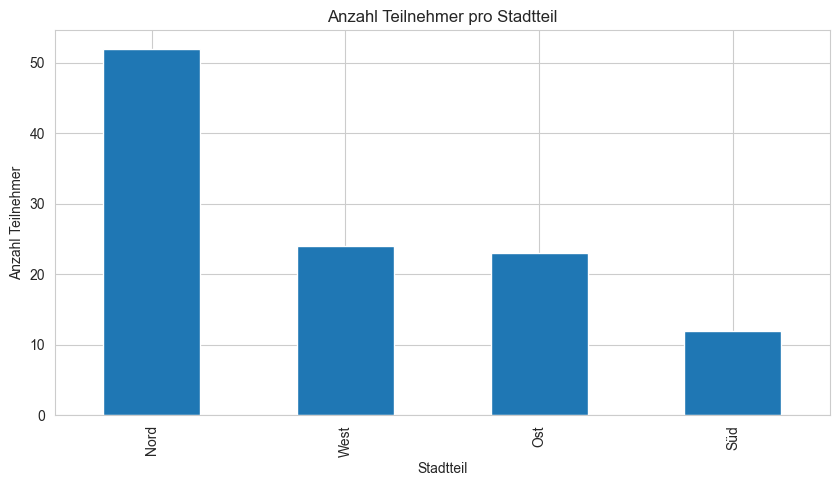

Von der Verteilung die man im Graph sieht, ist die Anzahl teilnehmer pro Stadtteil nicht fair verteilt. 
Vorallem ist da ein Unterschied zwischen dem südlichen und den nördlichen Stadtteil. 
Das könnte das Ergebnis beeinflussen.


In [175]:
# High volume: reicht das Volumen des Datensatzes aus, um die Hauptfrage zu beantworten?

print("Passt die Größe des Samples?")
print("Die Sample-größe ist "+str(nr_rows)+" ist etwas weniger als die hälfte der Mitglieder. Das ist eine plausible Größe.")

print("\nIst die Anzahl Teilnehmer pro Stadtteil ähnlich?")
display(df["stadtteil"].value_counts(dropna=False))
df['stadtteil'].value_counts().plot.bar(
    figsize=(10,5), 
    title="Anzahl Teilnehmer pro Stadtteil",
    xlabel="Stadtteil", 
    ylabel="Anzahl Teilnehmer")
plt.show()
print("Von der Verteilung die man im Graph sieht, ist die Anzahl teilnehmer pro Stadtteil nicht fair verteilt. ")
print("Vorallem ist da ein Unterschied zwischen dem südlichen und den nördlichen Stadtteil. ")
print("Das könnte das Ergebnis beeinflussen.")

In [176]:
#Complete: Haben die für die Analyse erforderlichen Hauptmerkmale/-attribute fehlenden Werte?

#Sind alle Spalten von den Metadaten vorhanden?
print("Sind alle 12 Spalten von den Metadaten vorhanden? "+str(nr_col==12))
display(df.columns)


Sind alle 12 Spalten von den Metadaten vorhanden? True


Index(['id', 'stadtteil', 'alter', 'entfernung', 'mo', 'di', 'mi', 'do', 'fr',
       'sa', 'so', 'favorit'],
      dtype='object')

In [177]:
#Gibt es fehlende Daten?
check = df.isnull()
print("Gibt es fehlende Daten? "+str(check.values.any()))

if(check.values.any()):
    print("Es gibt fehlende Daten und die sind verteilt wie folgt: ")
    print("Sum of all Nans? "+str(check.values.sum())); 
    print("Sum of Nans per column? \n"+str(check.sum()))
    print("count of existing values is "+str(df.count().sum()))



Gibt es fehlende Daten? True
Es gibt fehlende Daten und die sind verteilt wie folgt: 
Sum of all Nans? 11
Sum of Nans per column? 
id            0
stadtteil     0
alter         0
entfernung    4
mo            0
di            0
mi            0
do            0
fr            0
sa            0
so            0
favorit       7
dtype: int64
count of existing values is 1321


### Aufgabe 1.3 Plausibilitätschecks (8 Punkte)

Entsprechend der Informationen aus dem Bericht sind verschiedene Plausibilitätschecks der Daten denkbar. Bei diesen Checks wird geprüft, ob sich die Informationen des Berichts in den Daten wiederspiegeln.

*Führen Sie vier Plausibilitätschecks Ihrer Wahl durch. Geben Sie bei jedem Check an, auf welche Information aus dem PDF Sie sich beziehen und, ob der Check fehlgeschlagen ist oder nicht.*

In [178]:
# Ihre Lösung

#Plausibilitätscheck 1
#Alter der teilnehmenden Jugendlichen muss zwischen 9-19 sein.
print("Übersicht des Alters der Teilnehmer:")
display(df["alter"].value_counts())
print("Gibt es jugendliche, die jünger als 9 oder älter als 19 sind? "
      +str(len(df[(df["alter"] < 9) | (df["alter"] > 19)])==0))


Übersicht des Alters der Teilnehmer:


alter
10    23
9     21
11    19
17     8
19     8
15     8
12     7
14     7
13     6
16     2
18     2
Name: count, dtype: int64

Gibt es jugendliche, die jünger als 9 oder älter als 19 sind? True


In [179]:
#Plausibilitätscheck 2:
#Steht in den Metadaten: ID muss eindeutig sein, nur ein Eintrag pro ID!
print("sind alle IDs eindeutig? "+ str(pd.Series(df["id"]).is_unique))

display(df["id"].value_counts())

print("Es gibt insgesamt "+str(df.duplicated(subset='id').value_counts()[1])+" duplizierte IDs")

sind alle IDs eindeutig? False


id
W1787    2
W4166    2
W1933    1
O2550    1
N4654    1
        ..
N3859    1
O2083    1
O1511    1
N2138    1
S3600    1
Name: count, Length: 109, dtype: int64

Es gibt insgesamt 2 duplizierte IDs


In [180]:
#Plausibilitätscheck 3
#Wir wollen prüfen, ob dieses Muster (erster Buchstabe vom Stadtteil+) für alle Teilnehmer konsistent ist.

id_stadtteil_mapping = {
    "W":"West",
    "O":"Ost",
    "S":"Süd",
    "N":"Nord"
}
def check_id(teilnehmer_id, stadtteil):
    stadtteil_id = "".join(re.findall(regular_expression, teilnehmer_id))
    return id_stadtteil_mapping.get(stadtteil_id) == stadtteil

df.groupby("stadtteil").first()["id"]
regular_expression = "[A-Z]+" 
df.apply(lambda x: check_id(x["id"], x["stadtteil"]), axis=1).all()


True

In [191]:
#Plausibilitätscheck 4

#weitester entfernung nicht weiter als 5km
print("Übersicht der Entfernung:")
display(df["entfernung"].value_counts())
print("Gibt es jugendliche, die weiter als 5km wohnen? "
      +str(len(df[df["entfernung"] > 5.0])!=0))
#False = keiner wohnt weiter als 5 km vom Zentrum entfernt

Übersicht der Entfernung:


entfernung
0.59    3
0.36    2
2.17    2
1.59    2
0.66    2
       ..
1.62    1
2.46    1
2.30    1
1.25    1
4.76    1
Name: count, Length: 93, dtype: int64

Gibt es jugendliche, die weiter als 5km wohnen? False


### Aufgabe 1.4 Data Cleaning (12 Punkte)
Für eine sinnvolle Analyse sind diverse Vorverarbeitungsschritte notwendig. 

*Führen Sie Vorverarbeitungsmaßnahmen durch, die Ihrer Meinung nach nötig sind, um die Qualität der Daten zu verbessern. Begründen Sie für jede Maßnahme Ihr Vorgehen.*


> **Achtung**: *Eine **Umbenennung** von Spalten ist aus Zeitgründen nicht notwendig!*

In [182]:
# Ihre Lösung
#
jein_recoding = {
    "N": "Nein",
    "J": "Ja"
}
df['mo'] = df['mo'].map(jein_recoding).fillna(df['mo'])
df['di'] = df['mo'].map(jein_recoding).fillna(df['mo'])
df['mi'] = df['mo'].map(jein_recoding).fillna(df['mo'])
df['do'] = df['mo'].map(jein_recoding).fillna(df['mo'])
df['fr'] = df['mo'].map(jein_recoding).fillna(df['mo'])
df['sa'] = df['mo'].map(jein_recoding).fillna(df['mo'])
df['so'] = df['mo'].map(jein_recoding).fillna(df['mo'])

In [183]:
#Spalten umbennen:
col_renaming = {
    'mo':'montag',
    'di':'dienstag',
    'mi':'mittwoch',
    'do':'donnerstag',
    'fr':'freitag',
    'sa':'samstag',
    'so':'sonntag',
}
df.rename(columns = col_renaming, inplace = True)
df.columns

Index(['id', 'stadtteil', 'alter', 'entfernung', 'montag', 'dienstag',
       'mittwoch', 'donnerstag', 'freitag', 'samstag', 'sonntag', 'favorit'],
      dtype='object')

In [184]:
#drop duplicates
df.drop_duplicates(subset='id', keep='last', inplace=True)
display(df[df['id'].duplicated(keep='first')])

,id,stadtteil,alter,entfernung,montag,dienstag,mittwoch,donnerstag,freitag,samstag,sonntag,favorit


### Aufgabe 1.5 Analyse Stadtteil (3 + 3 Punkte)

*Gibt es einen Unterschied in der Anzahl Jugendlicher pro Stadtteil? Passt das Ergebnis zu den Informationen, die Sie über das Jugenzentrum haben? (3 Punkte)*

Interpretieren Sie die Aussage Ihres Codes, indem Sie die Antwort auf die Frage in die dafür vorgesehene Raw-Zelle schreiben.

stadtteil
Nord    52
Ost     23
West    22
Süd     12
Name: count, dtype: int64

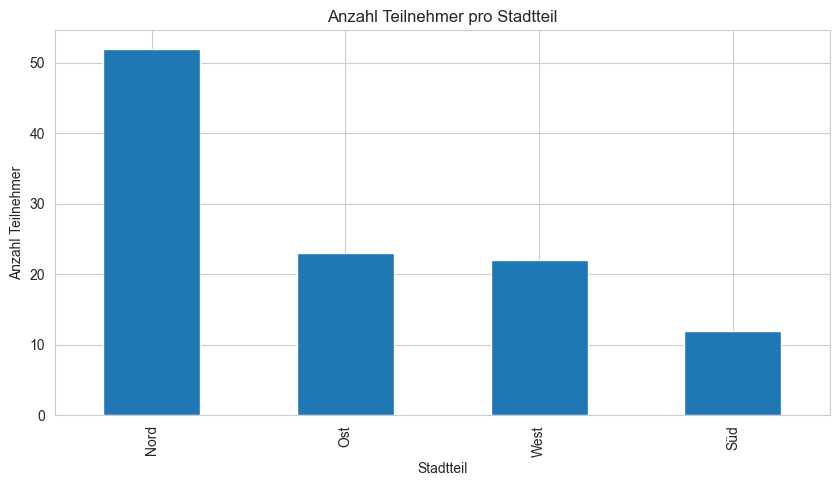

In [185]:
# Ihre Lösung
display(df["stadtteil"].value_counts(dropna=False))
df['stadtteil'].value_counts().plot.bar(
    figsize=(10,5), 
    title="Anzahl Teilnehmer pro Stadtteil",
    xlabel="Stadtteil", 
    ylabel="Anzahl Teilnehmer")
plt.show()

*Gibt es in der Wahl des Favoriten einen Unterschied in Abhängigkeit des Stadtteils? Beantworten Sie die Frage mithilfe von Kreisdiagrammen. Erstellen Sie dabei ein Kreisdiagramm pro Stadtteil. (3 Punkte)*

In [186]:
# Ihre Lösung
data = df.groupby(['favorit','stadtteil']).size().unstack('stadtteil')
display(data)
data.sum()

stadtteil,Nord,Ost,Süd,West
favorit,,,,
Kochen,11,4,2,4
Malen,15,6,3,6
Musik,6,1,1,2
Sport,10,5,3,4
Werken,7,5,2,5


stadtteil
Nord    49
Ost     21
Süd     11
West    21
dtype: int64

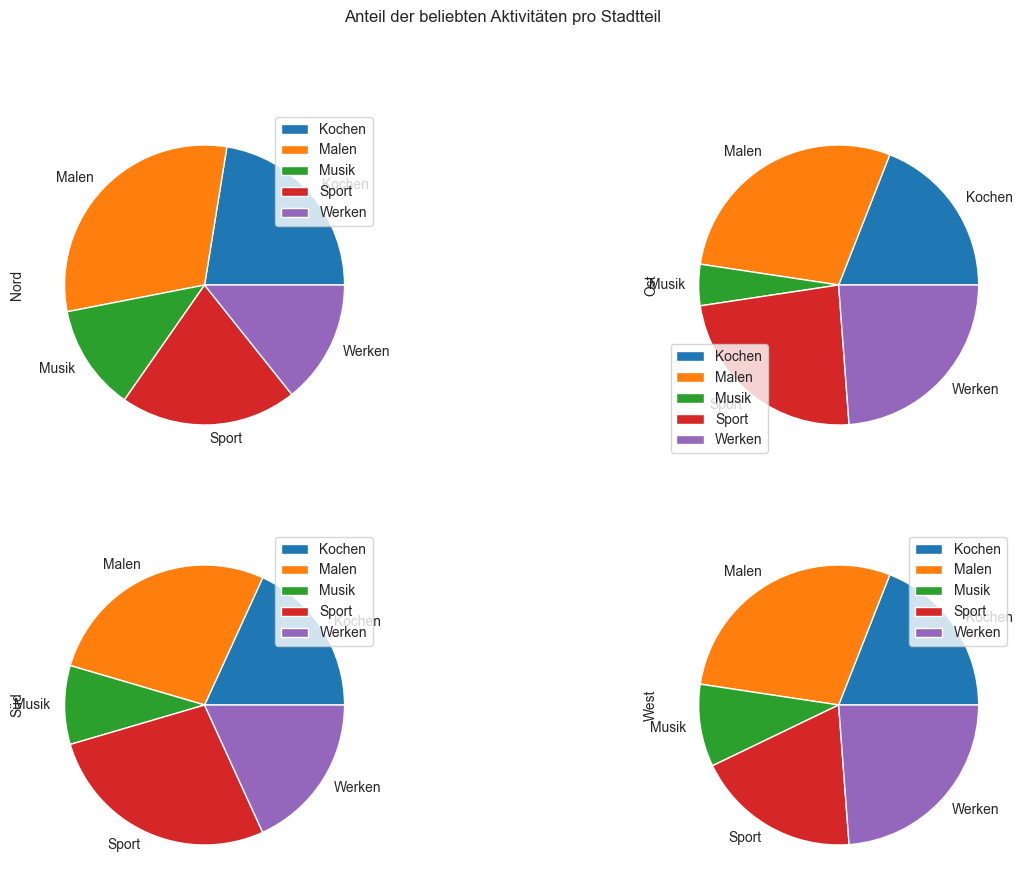

In [187]:
# Ihre Lösung
# Ihre Lösung
def absolute_value(val):
    a  = np.round(val/data.sum()*100, 0)
    return a


data.plot(kind="pie", 
figsize=(15,10), 
layout=(2, 2),
title="Anteil der beliebten Aktivitäten pro Stadtteil",
#autopct = absolute_value,
subplots=True)

plt.show()

### Aufgabe 1.6  Analyse Alter (2 + 3 Punkte)

*Analysieren Sie die Verteilung des Alters. Ist zu erkennen, ob eher jüngere oder eher ältere Jugendliche an der Umfrage teilgenommen haben? Entspricht die Verteilung der Befragten der aller Jugendlichen? (2 Punkte)*

count    109.000000
mean      12.330275
std        3.165365
min        9.000000
25%       10.000000
50%       11.000000
75%       15.000000
max       19.000000
Name: alter, dtype: float64

Man kann erkennen, dass die Mehrheit der teilnehmer, eher jünger sind
Der Durchschnittsalter der Teilnemer ist 12.330275229357799
die Mehrheit der teilnehmer ist zwischen 9 und 12 Jahre alt,´.


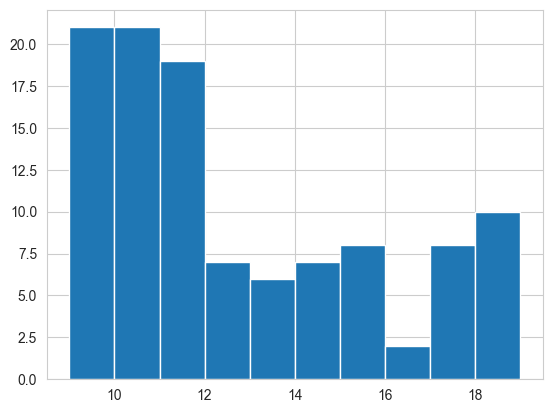

In [188]:
# Ihre Lösung
display(df['alter'].describe())
df['alter'].hist()
print("Man kann erkennen, dass die Mehrheit der teilnehmer, eher jünger sind")
print("Der Durchschnittsalter der Teilnemer ist "+str(df['alter'].mean()))
print("die Mehrheit der teilnehmer ist zwischen 9 und 12 Jahre alt,´.")



*Hängt die Wahl des Favoriten vom Alter ab? Erstellen Sie zur Beantwortung der Frage ein Säulendiagramm, bei pro Alter die Anzahl des Favoriten gezählt wird. (3 Punkte)*

alter
9     21
10    21
11    19
12     7
13     6
14     7
15     8
16     2
17     8
18     2
19     8
Name: favorit, dtype: int64

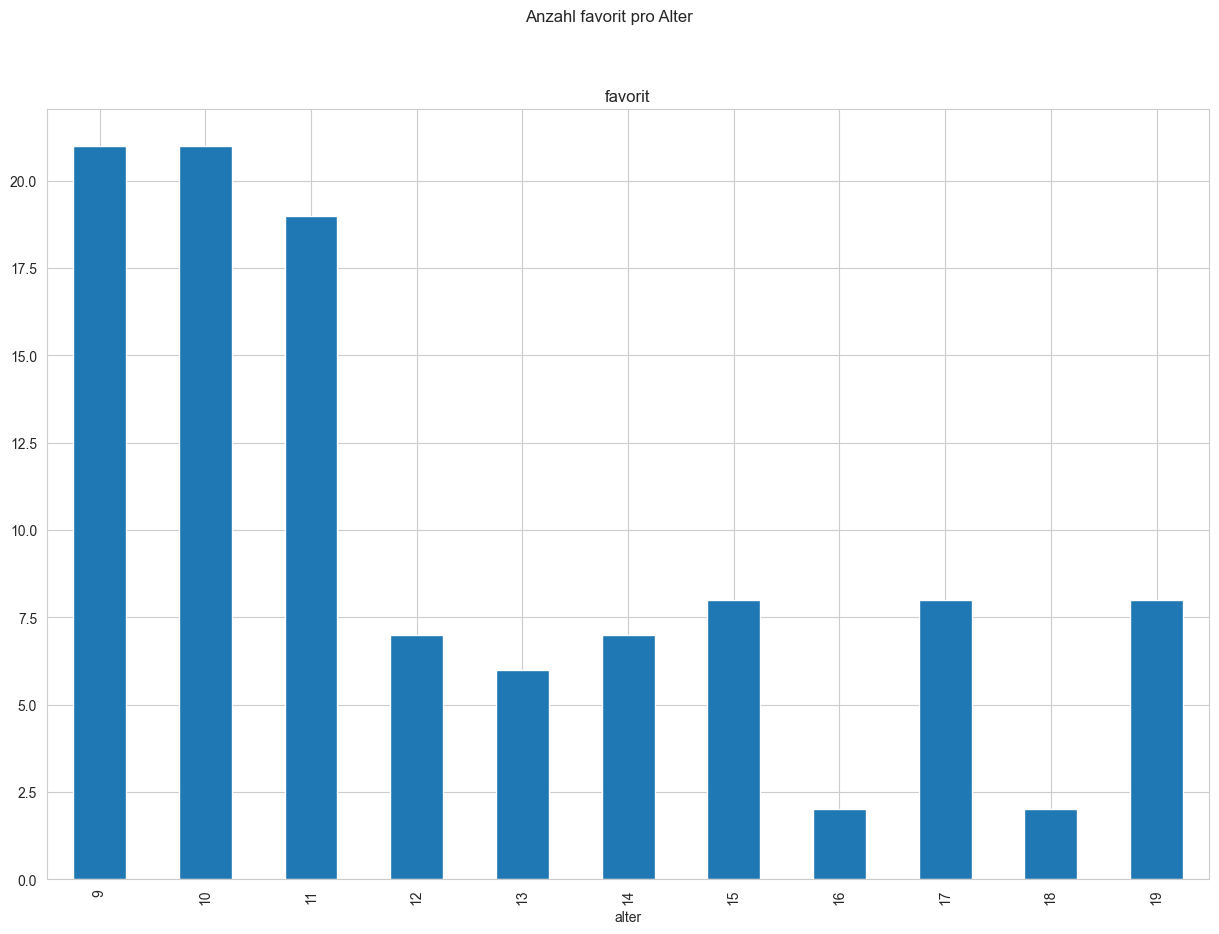

In [189]:
# Ihre Lösung
data2 = df.groupby('alter')["favorit"].size()
display(data2)
data2.plot(kind="bar", 
figsize=(15,10), 
title="Anzahl favorit pro Alter",
#autopct = absolute_value,
subplots=True)

plt.show()

### Aufgabe 1.7 Analyse Wochentage (4 Punkte)
*An welchem Tag kommen die meisten Jugendlichen ins Jugendzentrum? Beantworten Sie die Frage mit einem Säulendiagramm.*

> **Achtung**: *Da diese Aufgabe etwas komplexer ist, gibt es hier einen Punkt mehr als bei den anderen Diagrammen.*

montag
Nein    69
Ja      40
Name: count, dtype: int64

dienstag
Nein    69
Ja      40
Name: count, dtype: int64

mittwoch
Nein    69
Ja      40
Name: count, dtype: int64

donnerstag
Nein    69
Ja      40
Name: count, dtype: int64

freitag
Nein    69
Ja      40
Name: count, dtype: int64

samstag
Nein    69
Ja      40
Name: count, dtype: int64

sonntag
Nein    69
Ja      40
Name: count, dtype: int64

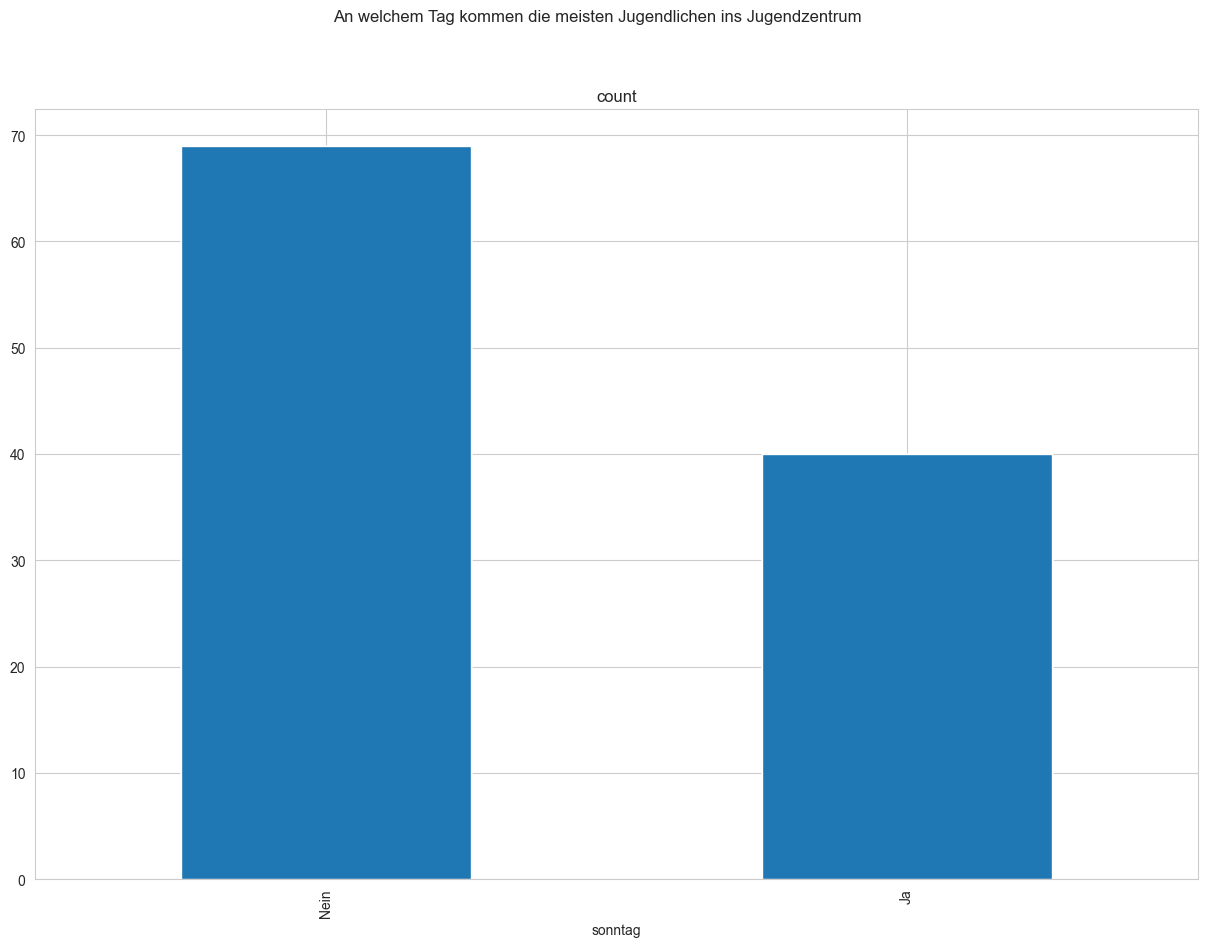

In [190]:
# Ihre Lösung
list_of_days = ["montag","dienstag","mittwoch","donnerstag","freitag","samstag","sonntag"]
#data3 = df[["montag","dienstag","mittwoch","donnerstag","freitag","samstag","sonntag"]]
df['montag']

for day in list_of_days:
    data3 = df[day].value_counts()
    display(data3)
    data3.plot(kind="bar", figsize=(15,10), title="An welchem Tag kommen die meisten Jugendlichen ins Jugendzentrum"
               ,subplots=True)
    

### Aufgabe 1.8 Data Fitness (6 Punkte)

*Entsprechend Ihrer Analysen: Beurteilen Sie die Data Fitness. Orientieren Sie sich dabei an den 3 Aspekten, die Sie im Buch von McGregor in Kapitel 3 kennengelernt haben (6 Punkte).*

### Aufgabe 1.9 Ergebnis (3 + 4 Punkte)

*Wenn Sie eine Entscheidung treffen müssten: Welche neue Aktivität sollte eingeführt werden und an welchem Wochentag? Beurteilen Sie die Aussagekraft dieses Ergebnisses in Bezug zu Ihrer Einschätzung von Data Fitness. (3 Punkte)*

*Nennen Sie die Aspekte, die bei der aktuellen Umfrage nicht beachtet wurden, aber Ihrer Meinung nach für den Anwendungsfall wichtig sind. Begründen Sie diese Aspekte und geben Sie außerdem an, welches Qualitätskriterium Sie damit verbessern würden. (4 Punkte)*

<span style="color:white">\newpage</span>.

## Aufgabe 2 - Big Data Analysis (15 Punkte)
In diesem Aufgabenbereich geht es um Hadoop und Spark.

### Aufgabe 2.1 Eigenschaften von Spark (3 Punkte)
Betrachten Sie folgendes Code-Beispiel:

> **Hinweis:** `**`-Operator = Potenz, z.B. `2**2 = 4`

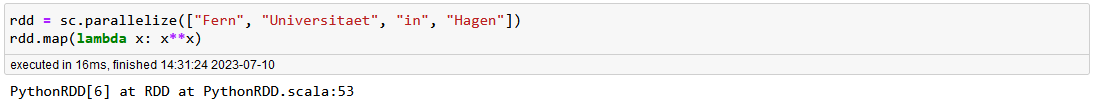

*Warum tritt hier kein Fehler auf, obwohl es nicht möglich ist, Strings zu potenzieren? Welches Prinzip von Spark liegt hier zugrunde, was bedeutet es und wofür ist es da? (3 Punkte)*

### Aufgabe 2.2 Caching (3 Punkte)
Betrachten Sie folgendes Code-Beispiel:

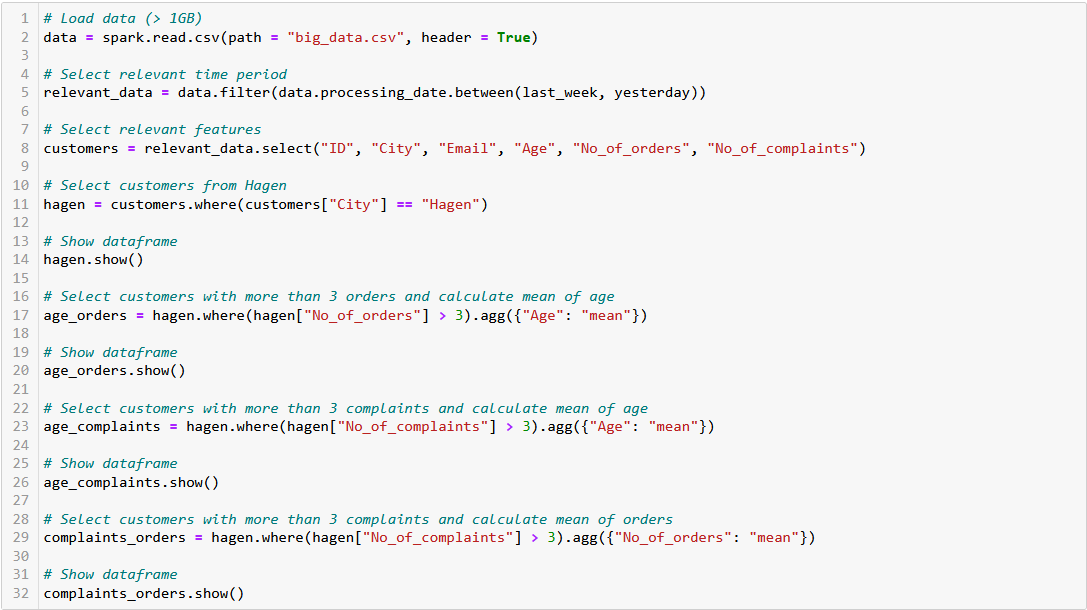

*In welcher Zeile wäre es sinnvoll ein Caching einzufügen und warum? (3 Punkte)*

### Aufgabe 2.3 Ressourcenvebrauch (4 + 5 Punkte)
Nehmen Sie an, es steht ein Cluster mit 100GB RAM und 100 Kernen zur Verfügung.

Gegeben sei folgender Auszug aus der Datei `spark-defaults.conf`:

```
spark.executor.instances 5
spark.executor.memory 10G
spark.executor.cores 5
spark.executor.memoryOverhead 1GB

spark.yarn.am.cores 5
spark.yarn.am.memory 5G
spark.yarn.am.memoryOverhead 1G

spark.dynamicAllocation.enabled false
```

Es wird eine pyspark-Shell mit folgendem Aufruf gestartet (zu diesem Zeitpunkt laufen keine weiteren Spark-Anwendungen):

`pyspark --master yarn --num-executors 10 --executor-memory 7.5G`

*Berechnen Sie den Ressourcen-Verbrauch (Memory und Cores) der Spark-Anwendung. Geben Sie dabei Ihren Rechenweg an. (4 Punkte)*

Während die eben gestartete pyspark-Shell noch läuft, wird eine zweite pyspark-Shell mit folgendem Aufruf gestartet:

`pyspark --master yarn`

*Wie viele Ressourcen werden benötigt? Kann die Shell gestartet werden? Kann Spark-Code ausgeführt werden? Begründen Sie Ihre Antworten! (5 Punkte)*

<span style="color:white">\newpage</span>.

## Aufgabe 3 - Modellierung, NoSQL (25 Punkte)

Der landesweite Verband von Jugendzentren verwendet aktuell ein relationales Datenbanksystem (PostgreSQL) für die Datenverwaltung. 
Ein neuer Mitarbeiter der IT-Abteilung hat die Idee zu einem NoSQL Datenbanksystem zu wechseln und schlägt aufgrund der Beliebtheit MongoDB vor.

Die nachfolgende Grafik zeigt zunächst einen vereinfachten Ausschnitt des aktuellen physischen Datenbankschemas (PostgreSQL) des IT-Systems der Vereinigung von Jugendzentren.

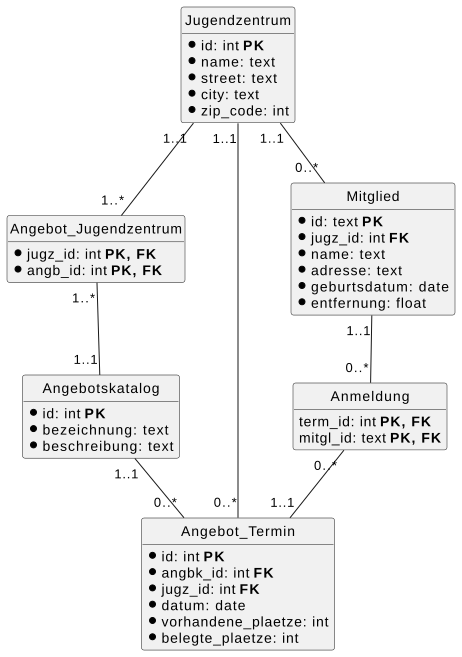

Für die Migration nach MongoDB wurden folgende Abfragen berücksichtigt. Diese erhalten außerdem bezüglich der Häufigkeit verschiedene Tags ("Sehr Häufig"; "Regelmäßig"; "Selten").

**Leseoperationen:**

- **R1** (Sehr Häufig). Gegeben ist eine *Jugendzentrum.id*, gebe folgende Attribute aus: *Angebotskatalog.id*, *Angebotskatalog.bezeichnung* und *Angebotskatalog.beschreibung*. 
    - **Beschreibung:** Mit dieser Abfrage werde alle Angebote, die ein bestimmtes Jugendzentrum anbietet angezeigt. 
- **R2** (Sehr Häufig). Gegeben ist eine *Jugendzentrum.id*, eine *Angebotskatalog.id* und ein *Datumsbereich*, gebe folgende Attribute aus: *Angebot_Termine.datum* und *Angebot_Termine.freie_plaetze*.
    - **Beschreibung:** Für ein bestimmtes Jugendzentrum, einen angegebenen Datumsbereich und ein bestimmtes Angebot, werden die noch freie Plätze der Termine angezeigt. 
- **R3** (Regelmäßig). Gegeben ist eine *Jugendzentrum.id* und ein *Datumsbereich*, gebe folgende Attribute aus: *Angebotskatalog.bezeichnung*, *Angebot_Termine.datum* und  *Mitglied.name* von Mitgliedern die sich für den Termin angemeldet haben.
    - **Beschreibung:** Mit dieser Abfrage lassen sich für ein bestimmtes Jugendzentrum und einem bestimmten Datumsbereich Listen mit den Namen der angemeldeten Mitglieder zu den vorhandenen Terminen der verschidenen Angebote ausgeben.
- **R4** (Selten). Gegeben ist eine *Jugendzentrum.id*, gebe folgende Attribute aus: *Angebotkatalog.id*, *Angebotkatalog.bezeichnung* und *anzahl_voll_ausgebucht* dessen Termine voll ausgebucht waren.
    - **Beschreibung:** Für ein bestimmtes Jugendzentrum wird eine Liste der Angebote ausgegeben die nach Anzahl voll ausgebuchter Plätze sortiert ist. 
- **R5** (Selten). Gegeben ist eine *Jugendzentrum.id*, gebe folgende Attribute aus: *Mitglied.id*, *Mitglied.name*, sowie die  *Wochentage* (z.B. 0-6) , an denen Anmeldungen zu Terminen vorlagen.
    - **Beschreibung:** Für ein bestimmtes Jugendzentrum wird eine Liste aller Mitglieder ausgegeben, für die jeweils angegeben ist, an welchen Wochentagen Anmeldungen zu Angeboten vorgenommen wurden.

**Schreiboperationen**

- **W1** (Selten). Gegeben ist eine *Jugendzentrum.id*, füge ein neues Mitglied (*name*, *adresse*, *geburtsdatum*, *entfernung*) hinzu.
    - **Beschreibung:** Neue Mitglieder werden einem bestimmten Jugendzentrum hinzugefügt. 
- **W2** (Regelmäßig). Gegeben ist eine *Jugendzentrum.id* und eine *Angebotskatalog.id*, füge einen neuen *Angebot_Termin* (*datum*, *vorhandene_plaetze*) hinzu.
    - **Beschreibung:** Für ein bestimmtes Jugendzentrum wird für ein Angebot ein neuer Termin hinzugefügt. 
- **W3** (Sehr Häufig). Gegeben ist eine *Mitglied.id* und eine *Angebot_Termin.id*, füge eine neue Anmeldung hinzu.
    - **Beschreibung:** Ein Mitglied wird für einen vorhandenen Termin angemeldet. 

Bei der Modellierung von Anmeldungen bezüglich angebotener Termine ist sich der Mitarbeiter allerdings unsicher und benötigt Unterstützung.
Im folgenden eine Darstellung des aktuellen Stands des migrierten Schemas (MongoDB):

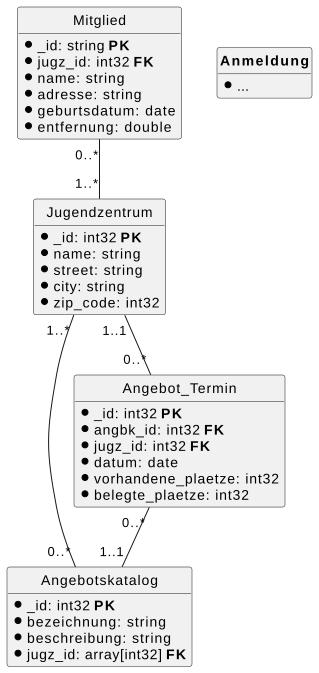

### Aufgabe 3.1 (2 Punkte)

Embedded vs. referentielle Modellierung bei dokumentorientierten Datenbanksystemen wie MongoDB.

Geben Sie zunächst Modellierungsrichtlinien bzw. Anwendungscharakteristika an, die einen starken Einfluss auf die Modellierung haben (embedded vs. referenziell).

### Aufgabe 3.2 (3 Punkte)  
    
Bei der Modellierung der *Anmeldungen* stellt sich die Frage diese zu referenzieren oder in *Angebot_Termin* einzubetten. Auf welche Abfragen hat diese Entscheidung eine Auswirkung?

Begründen Sie außerdem weshalb dies eine Auswirkung auf die entpsrechenden Abfragen hat.

### Aufgabe 3.3 (8 Punkte)  
    
Helfen Sie nun bei der Migration, indem Sie zunächst die Modellierung der *Anmeldung* vervollständigen. Begründen Sie Ihre Entscheidung, um diese den anderen Mitarbeitern nachvollziehbar darzulegen.

Vervollständigen Sie hierzu das nachfolgende Modell.

*HINWEIS:* Modellieren Sie eine Einbettung als "Composition".

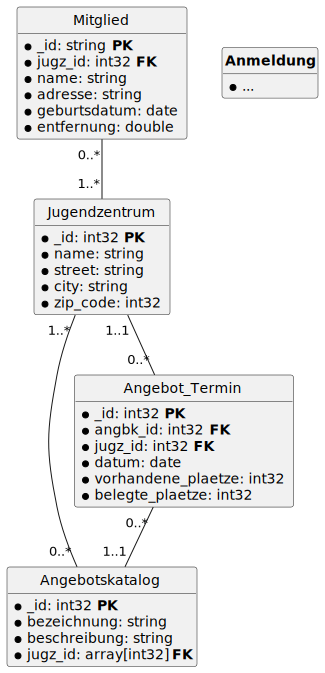

In [192]:
%%plantuml 

@startuml

hide circle
hide members
show fields

class "Jugendzentrum" as jz {
    * _id: int32 **PK**
    * name: string
    * street: string
    * city: string
    * zip_code: int32
}

class "Angebotskatalog" as a {
    * _id: int32 **PK**
    * bezeichnung: string
    * beschreibung: string
    * jugz_id: array[int32] **FK**
}

class "Angebot_Termin" as t {
    * _id: int32 **PK**
    * angbk_id: int32 **FK**
    * jugz_id: int32 **FK**
    * datum: date
    * vorhandene_plaetze: int32
    * belegte_plaetze: int32
}

class "**Anmeldung**" as an  {
    * ...
}


class "Mitglied" as m {
    * _id: string **PK**
    * jugz_id: int32 **FK**
    * name: string
    * adresse: string
    * geburtsdatum: date
    * entfernung: double
}


jz "1..*" -- "0..*" a
t "0..*" -- "1..1" a
jz "1..1" -- "0..*" t


m "0..*" -- "1..*" jz

@enduml

### Aufgabe 3.4 (2 Punkte)  
    
Nach der Migration der Daten wurde festgestellt, dass Abfragen **R3** und **R4** noch Probleme mit der Performance haben. Wie könnte die "MongoDB-Collection" *Angebot_Termin* erweitert bzw. angepasst werden, dass diese Abfragen möglichst optimal implementiert werden können?

### Aufgabe 3.5 (4 Punkte)

Der landesweite Verband von Jugendzentren hat sich vorgenommen die digitale Präsens weiter auszubauen. Es soll ein Framework für Blogs entwickelt werden. Jedes Mitglied soll Blog-Einträge mit Text und Fotos veröffentlichen können. Andere Nutzer können Einträge "liken" und "disliken" sowie Kommentare zu den Einträgen schreiben.

Der neue Mitarbeiter hat vorgeschlagen hierfür ebenfalls MongoDB als Datenbanksystem zu verwenden, hat dies allerdings noch nicht ausreichend begründet. Helfen Sie indem Sie Gründe für oder gegen die Verwendung von MongoDB als Datenbanksystem angeben. 

### Aufgabe 3.6 (4 Punkte)

Erläutern Sie die wesentlichen Unterschiede zwischen Dokumentorientierten Datenbanksystemen und Column-Family-Datenbanksystemen.

### Aufgabe 3.7 (2 Punkte)

Erläutern Sie das Konzept der aggregatorientierten Modellierung.

## Aufgabe 4 - Technologien für Big Data (5 Punkte)

### Aufgabe 4.1 (2 Punkte)
Sharding: Welche Vor- und Nachteile hat Range-based Sharding in Bezug auf die gleichmäßige Verteilung der Daten über die Knoten und in Bezug auf die Performance von Queries?


### Aufgabe 4.2 (2 Punkte)
Replikation: Welche Vor- und Nachteile hat die asynchrone Replikation? 

### Aufgabe 4.3 (1 Punkt)
Warum verwendet man in In-Memory-Datenbanksystemen zum Aktualisieren von Daten i.A. einen Differential Buffer und ersetzt nicht *in-place*?